# Segunda PreEntrega

## Alumna: Micaela Parra

## Abstract

La información genética está codificada en el ADN con un código que utiliza 4 letras o nucleótidos (A-G-T/U-C), los cuales se combinan formando distintos conjuntos de 3 letras (tripletes o codones). Cada codón codifica un aminoácido, un bloque que se combina con otros para construir las proteínas que intervienen en las reacciones celulares y fisiológicas. De los 64 codones, 61 codifican 20 aminoácidos denominados 'estándar', mientras que los 3 restantes son señales que le indican a la maquinaria de traducción que la proteína terminó de sintetizarse (codones STOP). El código genético se caracteriza por ser degenerado y redundante; es decir, que el mismo aminoácido puede ser codificado por diferentes codones (llamados codones sinónimos). Sin embargo, los codones sinónimos no se utilizan con frecuencias equivalentes, sino que algunos se prefieren sobre otros para codificar un determinado aminoácido. Este fenómeno se denomina 'sesgo en el uso codones', y diferentes especies tienen sesgos característicos. Asimismo, se ha observado que el sesgo también existe entre los distintos orgánulos celulares que contienen ADN (núcleo, mitocondria, cloroplasto, entre otros), y entre los genes dentro de un mismo organismo. Trabajos recientes han propuesto que la información sobre la distribución del uso de codones podría mejorar los algoritmos de búsqueda de genes codificantes de novo a partir de archivos de secuencias de ADN. El objetivo de este proyecto es construir un modelo capaz de predecir el grupo taxonómico de pertenencia y el tipo de ADN de origen a partir de datos de frecuencia de uso de codones. Para tal fin, se dispone de un dataset con los datos de cerca de 13000 organismos. Se realizó un análisis exploratorio de los datos orientado a recolectar información que soporte o rechace las hipótesis planteadas. Los resultados preliminares mostraron que si bien un solo par de codones (o los codones sinónimos para un mismo aminoácido) no parecen ser suficientemente informativos para clasificar los datos en su grupo taxonómico, distintos tipos de organismos presentan patrones globales de uso de codones que, en conjunto, podrían ser capaces de realizar una clasificación correcta. Por otra parte, los resultados mostraron que análisis futuros podrían beneficiarse de la combinación de los atributos 'grupo taxonómico' y 'tipo de ADN', en lugar de utilizarlos por separado. Como perspectivas futuras, se utilizarán distintos métodos estadísticos y de machine learning para seleccionar los codones más informativos y optimizar el modelo final. El conocimiento sobre la distribución del uso de codones en distintos organismos permitirá mejorar los métodos de búsqueda de genes codificantes, a menudo limitados por modelos simples basados en unos pocos organismos modelo. Dado que los codones han sido seleccionados durante la evolución, el estudio de este fenómeno permitirá no sólo desarrollar nuevos métodos de clasificación y anotación genómica, sino proveer información sobre el origen e historia natural de las especies y sus genes.

## Hipótesis

Las hipótesis propuestas son:
1. Dado un conjunto de frecuencias en el uso de codones de un organismo, es posible clasificarlo correctamente en su grupo taxonómico.
2. Dado un conjunto de frecuencias en el uso de codones de un organismo, es posible inferir su tipo de ADN de origen.

## Preguntas de interés

1. ¿La frecuencia en el uso de codones puede brindar información sobre el tipo de organismo y de ADN del que proviene?

2. ¿Existen correlaciones entre las frecuencias de uso de distintos pares de codones?
 - ¿Existen diferencias en los patrones de correlación entre grupos taxonómicos?
 - ¿Cuál es el efecto de incluir el grupo taxonómico y el tipo de ADN como variables en las correlaciones entre codones?
    
3. ¿Existen diferencias en las frecuencias de uso entre codones redundantes (que codifican un mismo aminoácido)?

4. ¿Cómo se comportan los datos en un análisis global de todos los codones en conjunto?
- ¿Cómo varía la frecuencia de uso de todos los codones dentro de cada grupo taxonómico?
- ¿Pueden distinguirse grupos cuando se consideran todos los codones en conjunto?

## Definición de objetivo

El objetivo de este proyecto es construir un modelo capaz de predecir el grupo taxonómico de pertenencia y el tipo de ADN de origen a partir de datos de frecuencia de uso de codones.

## Contexto

El secuenciamiento de genomas completos ya es una práctica de rutina en el laboratorio. La disponibilidad de distintas plataformas de secuenciación, así como su bajo costo, han permitido que las bases de datos genómicas crezcan exponencialmente. Sin embargo, nuestra capacidad para estimar el potencial codificante de los genomas no crece a la misma tasa. El proceso de identificar genes codificantes 'reales' a partir de un conjunto de secuencias requiere de múltiples pasos y a menudo de evidencia experimental, aumentando así el costo. En los últimos años se han propuesto múltiples soluciones bioinformáticas utilizando información disponible en bases de datos, pero la diversidad biológica de los organismos con frecuencia presenta desafíos y limitaciones a la hora de desarrollar métodos estandarizados. En este contexto surgió la posibilidad de incorporar la información disponible sobre el sesgo de uso de codones sinónimos para facilitar la identificación computacional de genes codificantes con potencial 'real' para producir proteínas. De esta manera, si los datos sobre uso de codones son característicos de un tipo de organismo, esta información podría mejorar el proceso de caracterización funcional de los genomas de distinto origen.

## Problema

El desafío consiste en determinar si los datos de frecuencia de uso de codones son capaces por sí mismos de clasificar correctamente a distintos organismos y su ADN de origen. De ser así, este conocimiento podría utilizarse para mejorar los algoritmos de detección de potencial codificante en distintos tipos de organismos.

## Contexto analítico

Hasta esta entrega se han considerado los siguientes puntos del contexto analítico:

1. Recolección de datos: La base de datos fue descargada del UCI Machine Learning Repository.

2. Preprocesamiento de datos: Se eliminarán aquellos datos con valores nulos o anómalos en las columnas de interés.

3. Análisis Exploratorio de Datos (EDA): Regresiones, estadística descriptiva, visualizaciones uni y multivariadas para identificar patrones en los datos.

## Dataset: Codon usage

Este dataset incluye datos sobre la frecuencia de uso de distintos codones (secuencias de ADN de tres letras) para distintos grupos taxonómicos.

Las columnas potencialmente interesantes para el análisis son:

1. "Kingdom/Grupo_taxonómico": Grupo donde se clasifica la especie.
2. "DNAtype/Tipo_ADN": Origen del ADN analizado (genómico, mitocondrial, cloroplasto, etc).
3. Columnas 7-71: Codones con sus respectivas frecuencias de uso.

## Importación de librerías

In [1]:
# Importar librerías.
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import numpy as np
from math import pi
from sklearn.decomposition import PCA

## Importación y procesamiento de datos

Antes de comenzar con el análisis exploratorio de los datos, se procesó el dataset original para eliminar nulos y duplicados, reemplazando nombres y categorías para facilitar la interpretación de los resultados.

In [2]:
# Dataset.
# Fuente: http://archive.ics.uci.edu/ml/datasets/Codon+usage

# Cargar el dataset desde el archivo CSV.
data = pd.read_csv('codon_usage.csv', low_memory=False)

In [3]:
# Dimensiones del dataset.
print(data.shape)

(13028, 69)


In [4]:
data.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


### Verificación de duplicados

In [5]:
print(data.shape)
data= data.drop_duplicates()
print(data.shape)

(13028, 69)
(13028, 69)


El dataset no contiene valores duplicados.

### Identificar celdas con datos no numéricos

In [6]:
def verificar_no_numericos(columna):
    return ~pd.to_numeric(columna, errors='coerce').notna()

# Lista de columnas a verificar.
columnas = ['UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA', 'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU', 'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC', 'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC', 'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG', 'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG', 'UAA', 'UAG', 'UGA' 
]

# Iterar sobre las columnas y verificar tipos de datos.
for columna in columnas:
    no_numericos = verificar_no_numericos(data[columna])

    if no_numericos.any():
        filas_no_numericas = data[no_numericos]
        print(f"Filas con datos no numéricos en la columna '{columna}':")
        print(filas_no_numericas)
    else:
        print(f"No hay datos no numéricos en la columna '{columna}'.")

Filas con datos no numéricos en la columna 'UUU':
     Kingdom  DNAtype  SpeciesID  Ncodons  \
486      vrl        0      12440     1238   
5063     bct        0     353569     1698   

                                        SpeciesName                    UUU  \
486                                           Non-A  non-B hepatitis virus   
5063  Salmonella enterica subsp. enterica serovar 4                   12;I   

          UUC     UUA      UUG      CUU  ...      CGG      AGA      AGG  \
486   0.04362  0.0210  0.01292  0.01292  ...  0.00081  0.00323  0.00242   
5063        -  0.0212  0.02356  0.01178  ...  0.03062  0.00118  0.00707   

          GAU      GAC      GAA      GAG      UAA      UAG      UGA  
486   0.00162  0.04443  0.01696  0.02423  0.02262  0.00162  0.00000  
5063  0.00118  0.00000  0.02945  0.02356  0.04476  0.02473  0.00118  

[2 rows x 69 columns]
Filas con datos no numéricos en la columna 'UUC':
     Kingdom  DNAtype  SpeciesID  Ncodons  \
5063     bct        0    

In [7]:
# Descartar filas.

filas_a_descartar = [486, 5063]
data = data.drop(filas_a_descartar)

In [8]:
# Dimensiones del dataset.
print(data.shape)

(13026, 69)


### Traducción del dataset y reemplazo de categorías

A continuación, se reemplazaron los nombres de las columnas y su contenido por nombres en español:

1. "Kingdom" -> "Grupo_taxonomico"
2. "DNAtype" -> "Tipo_ADN"
3. "SpeciesID" -> "Especies_ID"
4. "Ncodons" -> "N_codones"
5. "SpeciesName" -> "Nombre_especie"

La columna (2) se duplicó para crear una nueva columna llamada "Tipo_ADN_ID" para mantener el código numérico para cada tipo de ADN, mientras que en la nueva columna "Tipo_ADN" los valores numéricos se reemplazaron con categorías descriptivas en español.
Asimismo, las categorías de la columna (1) se completaron y tradujeron al español. Por ejemplo, "rod" > "Roedor".

In [9]:
# Duplicar columna 2.

data.insert(loc=2, column='Tipo_ADN_ID', value=data['DNAtype'])

# Cambiar nombres de las columnas.

reemplazar_encabezados = {
    'Kingdom': 'Grupo_taxonomico',
    'SpeciesID': 'Especies_ID',
    'Ncodons': 'N_codones',
    'SpeciesName': 'Nombre_especie',
    'DNAtype': 'Tipo_ADN'
}

data.rename(columns=reemplazar_encabezados, inplace=True)

# Reemplazar contenido de las columnas.

lista1 = ['arc','bct','phg','plm','pln','inv','vrt','mam','rod','pri','vrl']

lista2 = ['Archaea','Bacteria','Bacteriófago','Plásmido','Planta','Invertebrado','Vertebrado','Mamífero','Roedor','Primate','Virus']

data['Grupo_taxonomico'] = data['Grupo_taxonomico'].replace(lista1, lista2)

lista3 = [0,1,2,3,4,5,6,7,8,9,10,11,12]

lista4 = ['Genómico', 'Mitocondrial', 'Cloroplasto', 'Cianelo', 'Plástido', 'Nucleomorfo', 'Endosimbionte_secundario', 'Cromoplasto', 'Leucoplasto', 'NA', 'Protoplástido', 'Apicoplasto', 'Kinetoplasto']

data['Tipo_ADN'] = data['Tipo_ADN'].replace(lista3, lista4)

# Identificar filas con valores 'NA'.
filas_con_na = data[data['Tipo_ADN'] == 'NA']

print(filas_con_na)

# Descartar filas.

filas_a_descartar = [7887, 8361]
data = data.drop(filas_a_descartar)

     Grupo_taxonomico Tipo_ADN  Tipo_ADN_ID  Especies_ID  N_codones  \
7887           Planta       NA            9         4749       1515   
8361           Planta       NA            9        68897       1032   

           Nombre_especie      UUU      UUC      UUA      UUG  ...      CGG  \
7887  x Doritaenopsis sp.   0.0231  0.03036  0.01056  0.02574  ...  0.00924   
8361     x Tritordeum sp.  0.00678  0.02713  0.00097  0.01260  ...  0.00484   

          AGA      AGG      GAU      GAC      GAA      GAG      UAA  UAG  \
7887  0.02508  0.00396  0.03762  0.01452  0.02574  0.06205  0.00000  0.0   
8361  0.00291  0.00581  0.01647  0.03004  0.01453  0.03682  0.00097  0.0   

          UGA  
7887  0.00264  
8361  0.00000  

[2 rows x 70 columns]


In [10]:
data.head()

,Grupo_taxonomico,Tipo_ADN,Tipo_ADN_ID,Especies_ID,N_codones,Nombre_especie,UUU,UUC,UUA,UUG,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,Virus,Genómico,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,Virus,Genómico,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,Virus,Genómico,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,Virus,Genómico,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,Virus,Genómico,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


Dos filas con 'NA' en la columna 'Tipo_ADN' también fueron descartadas.

In [11]:
print(data.shape)

(13024, 70)


In [12]:
# Usa value_counts() para contar los registros en cada categoría
conteo_grupo = data['Grupo_taxonomico'].value_counts().reset_index()
conteo_grupo.columns = ['Grupo_taxonomico', 'Conteo']
conteo_ADN = data['Tipo_ADN'].value_counts().reset_index()
conteo_ADN.columns = ['Tipo_ADN', 'Conteo']

# Imprime el resumen
print("Número de registros según grupo taxonómico:")
print(conteo_grupo)
# Imprime el resumen
print("Número de registros según tipo de ADN:")
print(conteo_ADN)

Número de registros según grupo taxonómico:
   Grupo_taxonomico  Conteo
0          Bacteria    2919
1             Virus    2831
2            Planta    2521
3        Vertebrado    2077
4      Invertebrado    1345
5          Mamífero     572
6      Bacteriófago     220
7            Roedor     215
8           Primate     180
9           Archaea     126
10         Plásmido      18
Número de registros según tipo de ADN:
                   Tipo_ADN  Conteo
0                  Genómico    9265
1              Mitocondrial    2899
2               Cloroplasto     816
3                  Plástido      31
4              Kinetoplasto       5
5                   Cianelo       2
6               Nucleomorfo       2
7               Apicoplasto       2
8  Endosimbionte_secundario       1
9               Cromoplasto       1


Dataset final:

In [13]:
# Guardar nueva tabla en un archivo nuevo.
data.to_csv('codon_usage_v2.csv', index=False)

## Análisis Exploratorio de Datos (EDA)

A continuación se presentan distintos gráficos con el fin de explorar las tendencias de los datos a la luz de las hipótesis planteadas.

## 1. ¿Cómo varía la frecuencia de uso del codón de inicio (AUG) en función del grupo taxonómico y el tipo de ADN de origen?

### 1.1. Variación en la frecuencia de uso del codón de inicio (AUG)

El dataset contiene los datos de la frecuencia de uso de codones para distintos grupos taxonómicos y tipos de ADN. Para comenzar a explorar si las frecuencias varían entre grupos, se eligió un codón muy utilizado en todo el árbol de la vida: el codón AUG, utilizado para iniciar la traducción de proteínas.

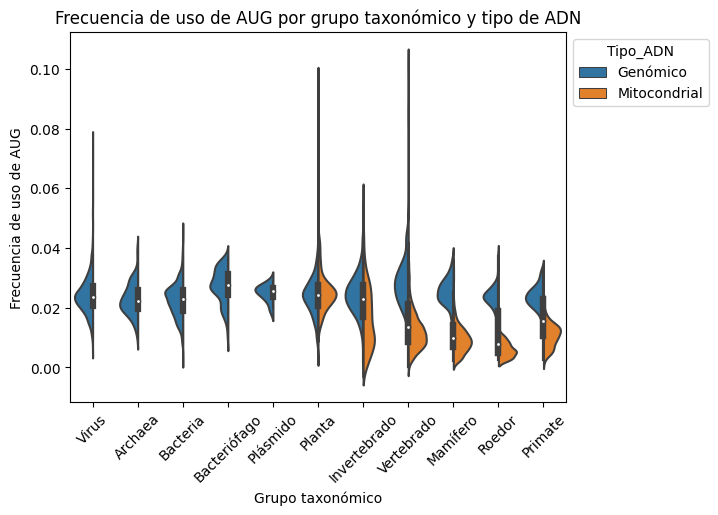

In [14]:
# Filtrar el dataframe para incluir sólo los valores deseados en 'Tipo_ADN'.
filtered_data = data[data['Tipo_ADN'].isin(['Genómico', 'Mitocondrial'])]

# Crear violin plot con los valores filtrados.
ax = sns.violinplot(x='Grupo_taxonomico', y='AUG', hue='Tipo_ADN', data=filtered_data, split = True)

# Agregar títulos a los ejes.
plt.xlabel('Grupo taxonómico')
plt.ylabel('Frecuencia de uso de AUG')

# Agregar título.
plt.title('Frecuencia de uso de AUG por grupo taxonómico y tipo de ADN')

# Rotar las etiquetas 45 grados.
plt.xticks(rotation=45)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Figura 1: Distribución de frecuencias de uso del codón AUG según grupo taxonómico y ADN de origen (genómico o mitocondrial).

Estos resultados muestran que los vertebrados (grupos 'Mamífero', 'Primate', 'Roedor' y 'Vertebrado') presentan medias de frecuencia de uso de AUG similares y menores con respecto a los invertebrados y a las plantas. Esto soporta la hipótesis de que pueden existir codones informativos para clasificar secuencias en su grupo taxonómico a partir de la frecuencia de uso de codones.
Por otra parte, las medias para el ADN genómico son similares, mientras que las medias de ADN mitocondrial varían entre grupos, con las plantas presentando el valor más alto.

Al comparar las frecuencias dentro de cada grupo discriminadas por origen del ADN, se observa que sólo las plantas utilizan el codón AUG con frecuencias similares en el genoma y en la mitocondria, aunque el ADN genómico presenta mayor variabilidad. En el resto de los grupos la frecuencia de uso de AUG es menor en el ADN mitocondrial con respecto al ADN genómico. Esto podría indicar que el ADN mitocondrial utiliza preferencialmente otro codón de inicio. Este resultado soporta la hipótesis de que pueden existir codones informativos para predecir el origen de una secuencia de ADN.

Cuando el análisis se extiende a todos los tipos de ADN, se observa que dentro de algunos grupos (por ej. 'Invertebrado'), las frecuencias en algunos tipos de ADN podrían ser significativamente diferentes:

In [15]:
# Medias de frecuencia de uso de AUG por grupo taxonómico y tipo de ADN.
medias_grupos = data.groupby(['Grupo_taxonomico', 'Tipo_ADN'])['AUG'].mean()

print(medias_grupos)

Grupo_taxonomico  Tipo_ADN                
Archaea           Genómico                    0.022898
Bacteria          Endosimbionte_secundario    0.041140
                  Genómico                    0.022594
                  Plástido                    0.024880
Bacteriófago      Genómico                    0.027300
Invertebrado      Apicoplasto                 0.014790
                  Cloroplasto                 0.012340
                  Genómico                    0.024707
                  Kinetoplasto                0.027774
                  Mitocondrial                0.016231
                  Nucleomorfo                 0.018760
                  Plástido                    0.013527
Mamífero          Genómico                    0.025042
                  Mitocondrial                0.009189
Planta            Cianelo                     0.021415
                  Cloroplasto                 0.019839
                  Cromoplasto                 0.015150
                  Genó

<Figure size 1000x600 with 0 Axes>

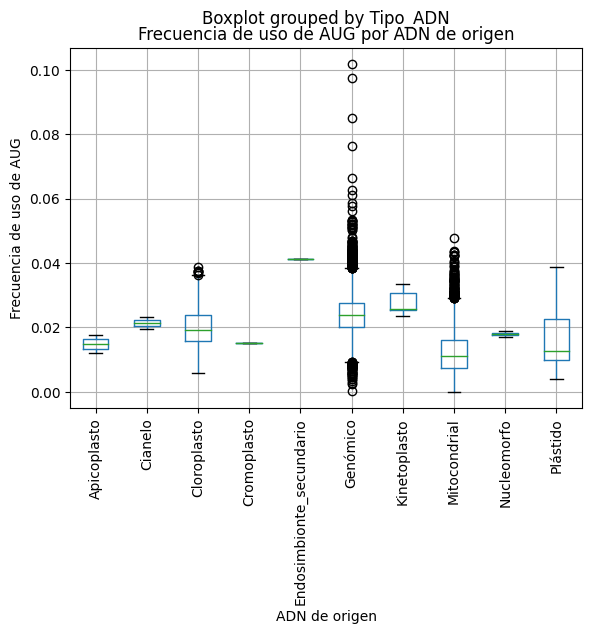

In [16]:
# Tamaño de la figura.
plt.figure(figsize=(10, 6))

# Graficar boxplot con datos de la columna 'AUG', agrupando por la columna 'Tipo_ADN'.
data.boxplot(column='AUG', by='Tipo_ADN')

# Agregar título.
plt.title('Frecuencia de uso de AUG por ADN de origen')

# Agregar títulos a los ejes.
plt.xlabel('ADN de origen')
plt.ylabel('Frecuencia de uso de AUG')

# Rotar las etiquetas 90 grados.
plt.xticks(rotation=90)
plt.show()

Figura 2: Distribución de las frecuencias de uso del codón AUG según su ADN de origen.

Los resultados muestran que las medianas de frecuencia de uso de AUG varían según el ADN de origen. La mediana del ADN genómico fue mayor que la del ADN mitocondrial (como se observó en la Figura 1), que a su vez presenta la menor mediana de todos los tipos de ADN. La mayor mediana la presentó el ADN de un endosimbionte secundario, pero el dato quizás debería ser descartado por ser el único en su tipo (n=1). En líneas generales, estos resultados soportan la hipótesis 2.

Estos resultados fueron promisorios para continuar con el análisis global con todos los codones.

## 2. ¿Existen correlaciones entre las frecuencias de uso de distintos pares de codones?

Como se mencionó anteriormente, los resultados para el codón AUG fueron alentadores, sugiriendo que era válido realizar un análisis más amplio. Para empezar, se procedió a calcular las correlaciones entre todos los pares de codones, sin discriminar por ninguna variable explicativa.

### 2.1. Correlaciones entre las frecuencias de uso de todos los codones

In [17]:
# Correlaciones entre las frecuencias de uso de todos los codones.

# Extraer columnas con frecuencias.
codones = data.iloc[:, 6:70]
#print(codones)

# Calcular correlaciones de a pares.
codones.corr()

,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
UUU,1.000000,-0.354073,0.761443,0.337815,0.312838,-0.433251,0.022282,-0.488971,0.722357,-0.424844,...,-0.343613,0.303701,-0.104955,0.163568,-0.598969,0.154083,-0.452576,0.161904,0.008273,0.154562
UUC,-0.354073,1.000000,-0.293131,-0.392019,0.035689,0.601370,0.485327,0.152302,-0.220607,0.739861,...,0.023951,-0.469525,-0.195664,-0.569674,0.198718,-0.464546,-0.079175,-0.014784,-0.046378,0.441308
UUA,0.761443,-0.293131,1.000000,0.024481,0.255698,-0.364363,0.189228,-0.552014,0.821588,-0.294491,...,-0.396608,0.231940,-0.273744,0.081034,-0.633754,0.188331,-0.577721,0.263068,0.009472,0.331437
UUG,0.337815,-0.392019,0.024481,1.000000,-0.008381,-0.476543,-0.418940,-0.145956,0.032807,-0.493543,...,-0.036998,0.396119,0.288063,0.475902,-0.159603,0.315465,0.115123,-0.131157,0.053642,-0.468197
CUU,0.312838,0.035689,0.255698,-0.008381,1.000000,0.190493,0.362008,-0.418990,0.434971,-0.028238,...,-0.369103,-0.083298,-0.177272,-0.139880,-0.507632,-0.028006,-0.430838,0.168437,0.010339,0.422578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAA,0.154083,-0.464546,0.188331,0.315465,-0.028006,-0.532887,-0.286817,-0.291134,0.175428,-0.426183,...,-0.228086,0.476883,0.046396,0.684606,-0.218428,1.000000,-0.085102,0.077870,-0.019809,-0.402056
GAG,-0.452576,-0.079175,-0.577721,0.115123,-0.430838,0.013341,-0.592619,0.561773,-0.636479,-0.117469,...,0.524443,0.056753,0.477772,0.120084,0.673310,-0.085102,1.000000,-0.289538,0.004241,-0.582658
UAA,0.161904,-0.014784,0.263068,-0.131157,0.168437,0.014531,0.237389,-0.229207,0.263251,0.027221,...,-0.251578,0.020188,-0.157454,-0.067367,-0.292166,0.077870,-0.289538,1.000000,0.136407,0.276966
UAG,0.008273,-0.046378,0.009472,0.053642,0.010339,-0.009272,-0.031237,-0.025874,-0.015868,-0.046287,...,-0.001641,0.050179,0.085670,-0.010043,-0.053814,-0.019809,0.004241,0.136407,1.000000,0.006952


<Axes: >

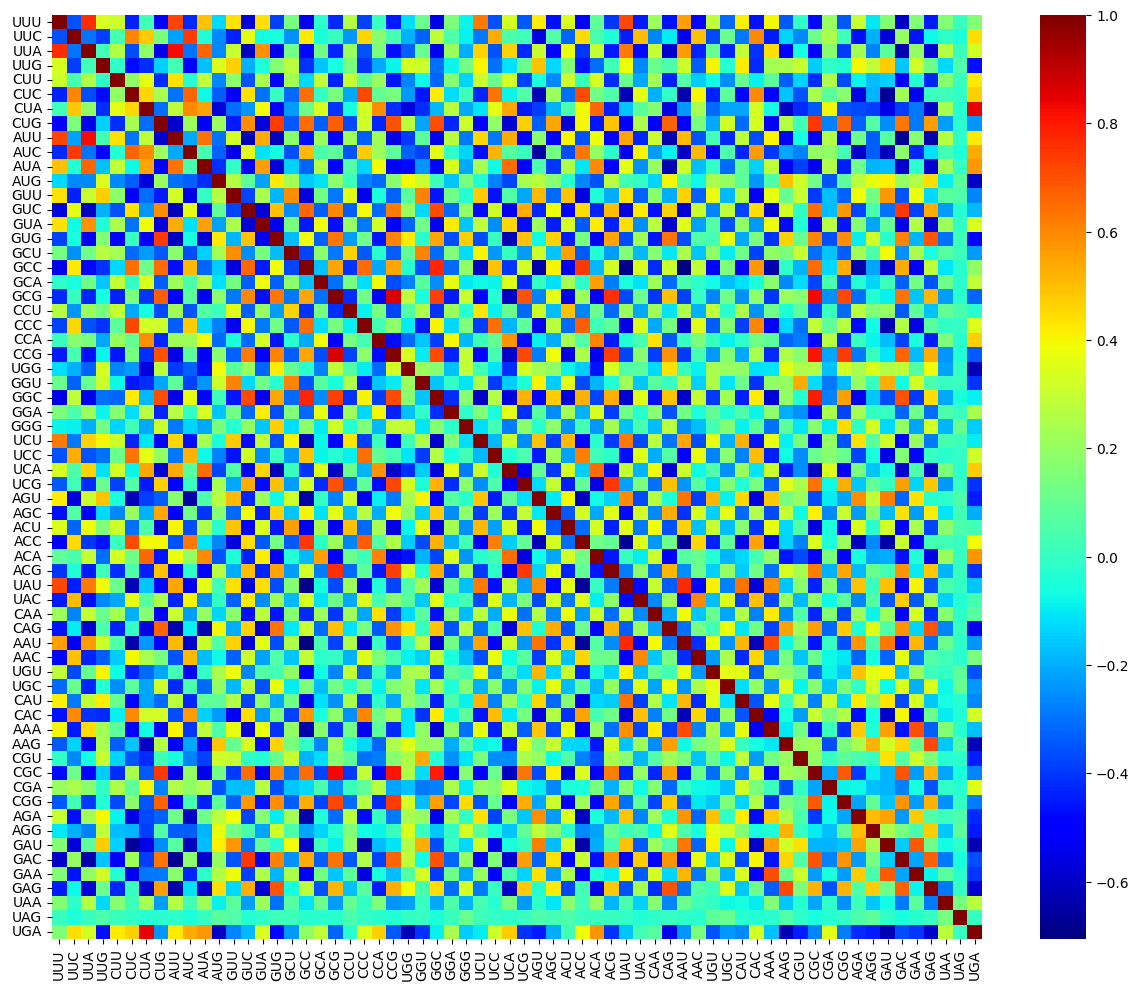

In [16]:
plt.figure(figsize=(15,12))
sns.heatmap(data=codones.corr(), cmap='jet')

Figura 3: Heatmap representando los valores de correlaciones entre todos los pares de codones.

En la Figura 3 puede observarse que los valores de correlación entre los codones son variables.

### 2.2. Correlaciones entre codones según el grupo taxonómico

La siguiente pregunta a contestar era ¿existen diferencias entre los valores de correlación de codones según el grupo taxonómico? Para contestarla, se eligieron dos grupos taxonómicos diferentes dentro del gran grupo de los animales para explorar las variaciones.

In [18]:
# Filtrar el dataset por la categoría "Vertebrado"
vertebrado = data[data['Grupo_taxonomico'] == 'Vertebrado']

# Filtrar el dataset por la categoría "Invertebrado"
invertebrado = data[data['Grupo_taxonomico'] == 'Invertebrado']

In [19]:
codones_vert = vertebrado.iloc[:, 6:70]
codones_invert = invertebrado.iloc[:, 6:70]
#print(codones_vert)
#print(codones_invert)

# Calcular correlaciones de a pares.
codones_vert.corr()
codones_invert.corr()

,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
UUU,1.000000,-0.539504,0.847856,0.269529,0.247609,-0.593050,0.291452,-0.554124,0.774136,-0.580438,...,-0.315467,0.286946,-0.178280,-0.351774,-0.727728,-0.367341,-0.612020,0.107881,0.056058,0.657440
UUC,-0.539504,1.000000,-0.551950,-0.160373,-0.039311,0.656777,-0.000323,0.472335,-0.500470,0.652831,...,0.226234,-0.296135,0.160819,-0.042424,0.606500,-0.056549,0.426040,-0.127599,-0.016690,-0.358584
UUA,0.847856,-0.551950,1.000000,-0.020510,0.157347,-0.631759,0.309128,-0.627183,0.882487,-0.571683,...,-0.385624,0.368236,-0.305480,-0.334586,-0.762470,-0.263630,-0.696953,0.149352,0.010910,0.697890
UUG,0.269529,-0.160373,-0.020510,1.000000,0.102665,-0.191830,-0.055086,-0.122700,-0.064431,-0.212801,...,0.013043,-0.058262,0.194100,0.060528,-0.203710,-0.014745,-0.078717,-0.051272,0.146174,-0.096253
CUU,0.247609,-0.039311,0.157347,0.102665,1.000000,0.001881,0.427499,-0.321209,0.192375,-0.127029,...,-0.182036,0.211746,0.010459,-0.089748,-0.285690,0.014255,-0.304744,0.043551,0.111476,0.197657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAA,-0.367341,-0.056549,-0.263630,-0.014745,0.014255,-0.077450,-0.217734,-0.188840,-0.190070,-0.079360,...,-0.190005,0.220457,-0.059781,0.680998,0.091506,1.000000,-0.007453,0.025502,-0.048306,-0.373027
GAG,-0.612020,0.426040,-0.696953,-0.078717,-0.304744,0.596553,-0.398350,0.715777,-0.668113,0.545545,...,0.465279,-0.445100,0.319700,0.103567,0.740623,-0.007453,1.000000,-0.186046,-0.049355,-0.519451
UAA,0.107881,-0.127599,0.149352,-0.051272,0.043551,-0.137418,0.124318,-0.212216,0.169924,-0.098513,...,-0.223712,0.332451,-0.123261,0.012867,-0.233146,0.025502,-0.186046,1.000000,0.583221,0.253231
UAG,0.056058,-0.016690,0.010910,0.146174,0.111476,0.020859,0.032315,-0.059009,0.000242,-0.052266,...,-0.017568,0.184915,0.072052,0.018891,-0.093914,-0.048306,-0.049355,0.583221,1.000000,0.014611


<Axes: >

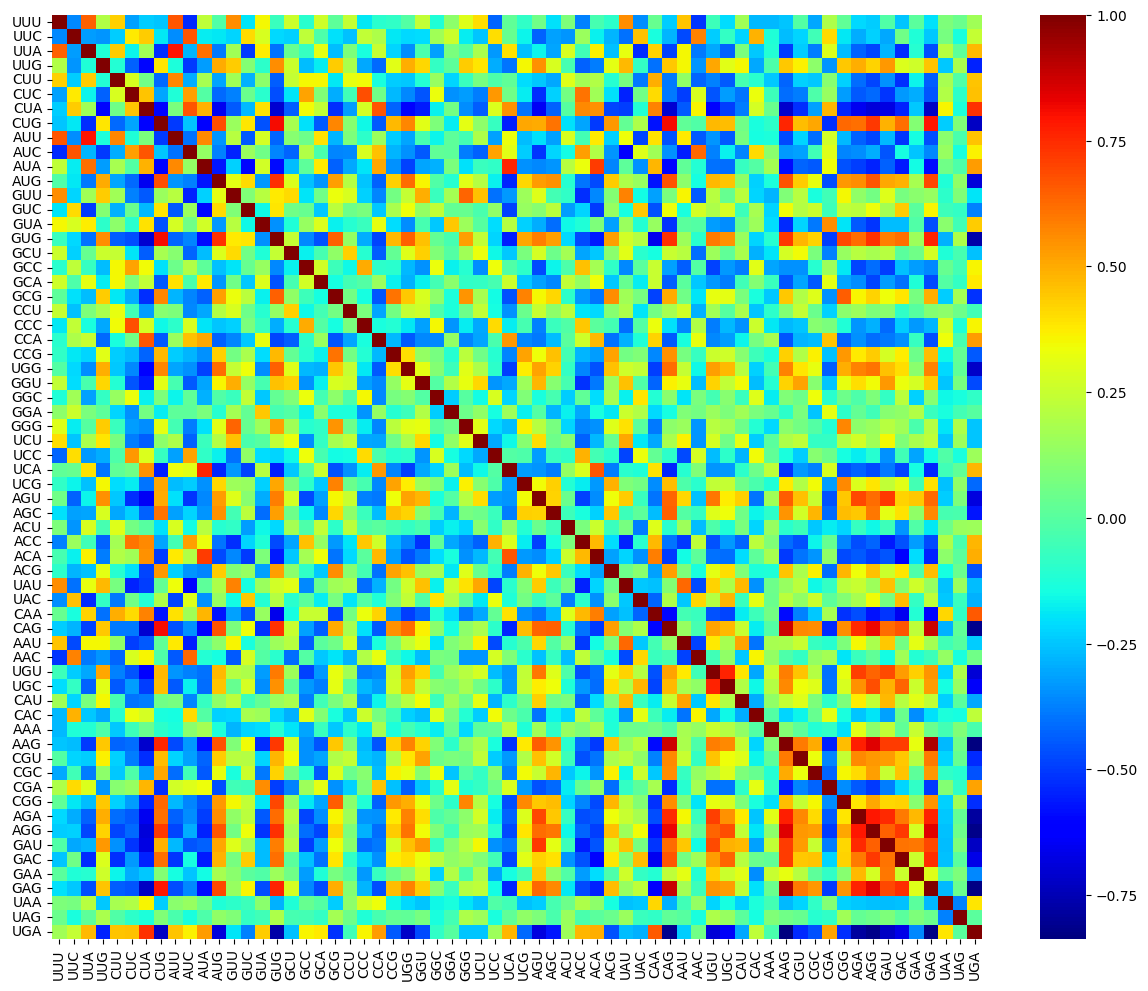

In [20]:
plt.figure(figsize=(15,12))
sns.heatmap(data=codones_vert.corr(), cmap='jet')

Figura 4: Heatmap representando los valores de correlaciones entre todos los pares de codones en el grupo Vertebrados.

<Axes: >

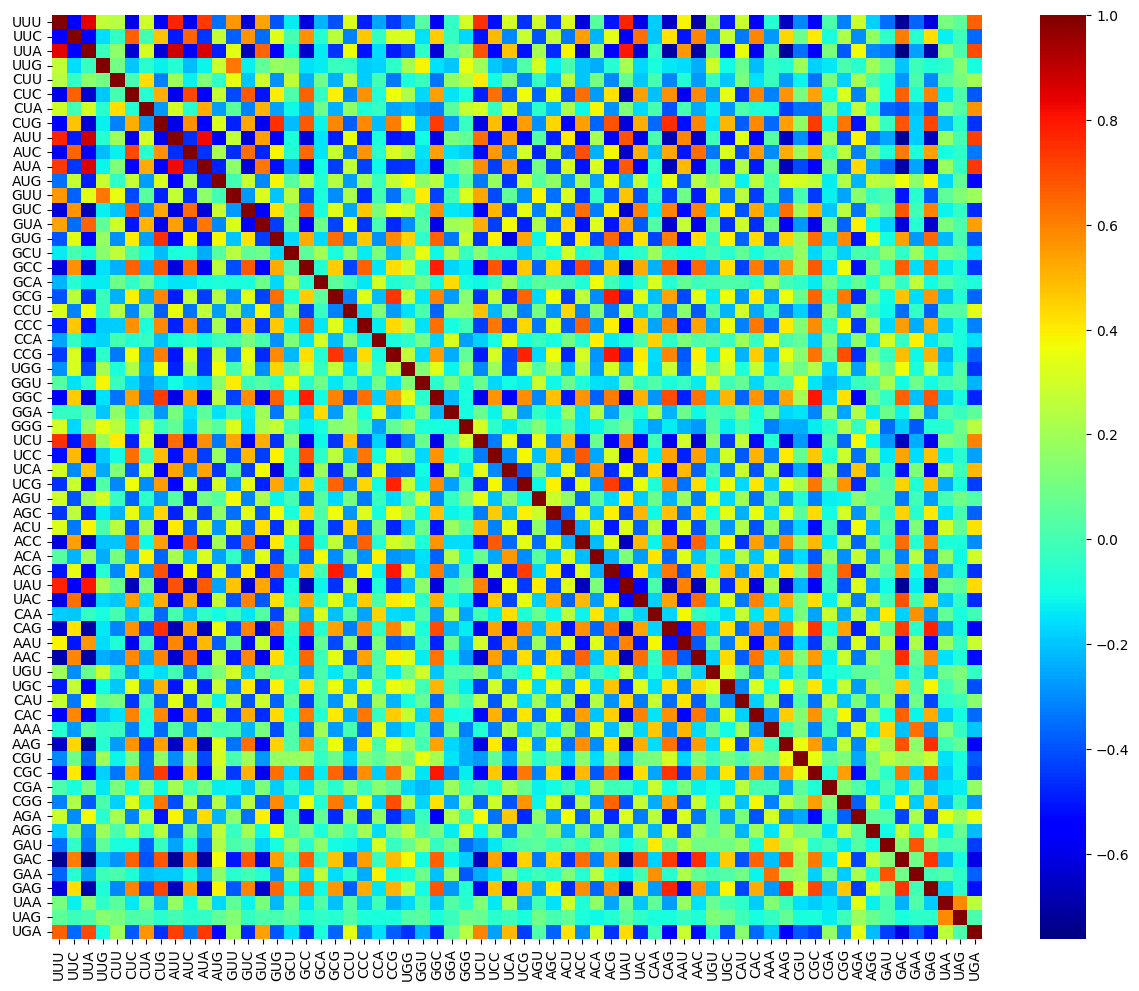

In [21]:
plt.figure(figsize=(15,12))
sns.heatmap(data=codones_invert.corr(), cmap='jet')

Figura 5: Heatmap representando los valores de correlaciones entre todos los pares de codones en el grupo Invertebrados.

Cuando se comparan los valores de correlación entre vertebrados e invertebrados se observa que existen diferencias. Por ejemplo, se observa una correlación positiva entre los codones CGG, AGA, AGG, GAU, GAC y GAG en vertebrados, que está ausente o es menor en invertebrados. Esto indica que estos codones podrían ser informativos para clasificar una secuencia entre estos dos grupos.

## 3. ¿Cuál es el efecto de incluir el grupo taxonómico y el tipo de ADN como variables en las correlaciones entre codones?

Luego del análisis global de las correlaciones, se analizaron casos puntuales calculando modelos lineales con distintas variables para explorar el impacto de la inclusión de las variables explicativas "grupo taxonómico" y "tipo de ADN".

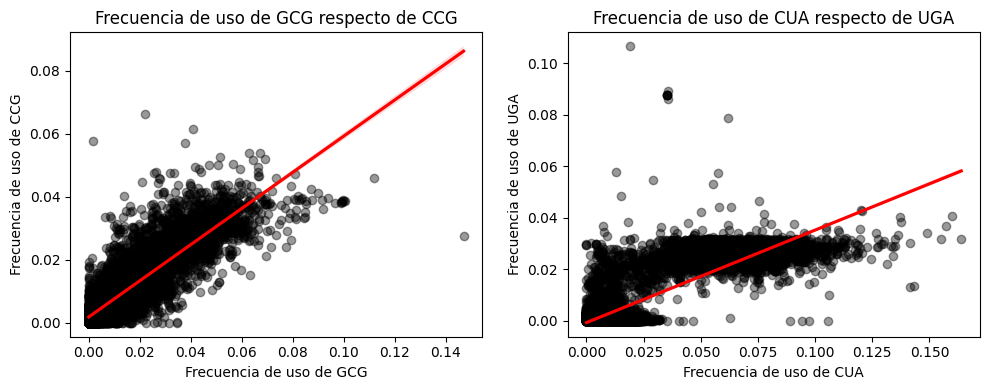

In [22]:
# Tamaño de la figura, número y distribución de los paneles.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Gráfico de dispersión 1.

# Agregar título.
ax1.set_title('Frecuencia de uso de GCG respecto de CCG')
sns.regplot(data=data, x='GCG', y='CCG', ax=ax1, scatter_kws = {"color": "black", "alpha": 0.4}, line_kws = {"color": "red"})

# Agregar títulos a los ejes.
ax1.set_xlabel('Frecuencia de uso de GCG')
ax1.set_ylabel('Frecuencia de uso de CCG')

# Gráfico de dispersión 2.

# Agregar título.
ax2.set_title('Frecuencia de uso de CUA respecto de UGA')
sns.regplot(data=data, x='CUA', y='UGA', ax=ax2, scatter_kws = {"color": "black", "alpha": 0.4}, line_kws = {"color": "red"})

# Agregar títulos a los ejes.
ax2.set_xlabel('Frecuencia de uso de CUA')
ax2.set_ylabel('Frecuencia de uso de UGA')

plt.tight_layout()
plt.show()

Figura 6: Gráficos de dispersión mostrando las tendencias entre pares de codones con valores de correlación altos.

En la Figura 6 se observa que las frecuencias de uso de los codones CCG y GCG están relacionadas positivamente con un alto valor de correlación (0.87 según la matriz calculada). CUA y UGA también presentaron un valor de correlación alto (0.84), pero el gráfico de dispersión muestra que la función lineal podría no ser la que mejor se ajusta a los datos.

In [23]:
model1 = 'CCG~GCG'
lm1 = sm.ols(formula = model1, data = data).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    CCG   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 4.036e+04
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:16:21   Log-Likelihood:                 52115.
No. Observations:               13024   AIC:                        -1.042e+05
Df Residuals:                   13022   BIC:                        -1.042e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0019   5.12e-05     36.779      0.0

In [24]:
model2 = 'CCG~Grupo_taxonomico+GCG'
lm2 = sm.ols(formula = model2, data = data).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    CCG   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     3735.
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:16:22   Log-Likelihood:                 52206.
No. Observations:               13024   AIC:                        -1.044e+05
Df Residuals:                   13012   BIC:                        -1.043e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [25]:
model3 = 'CCG~Tipo_ADN+GCG'
lm3 = sm.ols(formula = model3, data = data).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    CCG   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     4170.
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:16:22   Log-Likelihood:                 52279.
No. Observations:               13024   AIC:                        -1.045e+05
Df Residuals:                   13013   BIC:                        -1.045e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [26]:
model4 = 'UGA~CUA'
lm4 = sm.ols(formula = model4, data = data).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    UGA   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                 3.183e+04
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:16:25   Log-Likelihood:                 49109.
No. Observations:               13024   AIC:                        -9.821e+04
Df Residuals:                   13022   BIC:                        -9.820e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0007   6.21e-05    -10.705      0.0

In [27]:
model5 = 'UGA~Grupo_taxonomico+CUA'
lm5 = sm.ols(formula = model5, data = data).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    UGA   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     4089.
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:16:27   Log-Likelihood:                 50787.
No. Observations:               13024   AIC:                        -1.016e+05
Df Residuals:                   13012   BIC:                        -1.015e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [28]:
model6 = 'UGA~Tipo_ADN+CUA'
lm6 = sm.ols(formula = model6, data = data).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    UGA   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     9231.
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:16:32   Log-Likelihood:                 54673.
No. Observations:               13024   AIC:                        -1.093e+05
Df Residuals:                   13013   BIC:                        -1.092e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Al calcular modelos de regresión para los pares presentados en la Figura 6, se observa que los valores de r cuadrado son mayores a 70%, y su valor aumenta cuando las variables "grupo_taxonómico" o "tipo_ADN" son consideradas en el modelo. Sin embargo, al considerar el tipo de ADN como variable, los p-valores del intercepto son > 0.05; es decir, que no hay suficiente evidencia para rechazar la hipótesis nula.
Los p-valores por categoría variaron según el caso. Por ejemplo, existe evidencia de una relación lineal para la categoría Roedor tanto en el modelo 2 (CCG en función de Grupo_taxonomico+GCG) como en el modelo 5 (UGA en función de Grupo_taxonomico+CUA), mientras que para las categorías de tipo de ADN sólo la mitocondrial y el kinetoplasto presentaron valores significativos cuando se utilizó el modelo 'UGA en función de Tipo_ADN+CUA'.
Estos resultados soportan la idea de que cada caso es particular según las categorías consideradas.

## 4. ¿Existen diferencias en las frecuencias de uso entre codones redundantes (que codifican un mismo aminoácido)?

A continuación, se exploraron las diferencias para los codones que codifican un solo tipo de aminoácido. Se tomó como ejemplo la alanina, codificado por 4 codones diferentes.

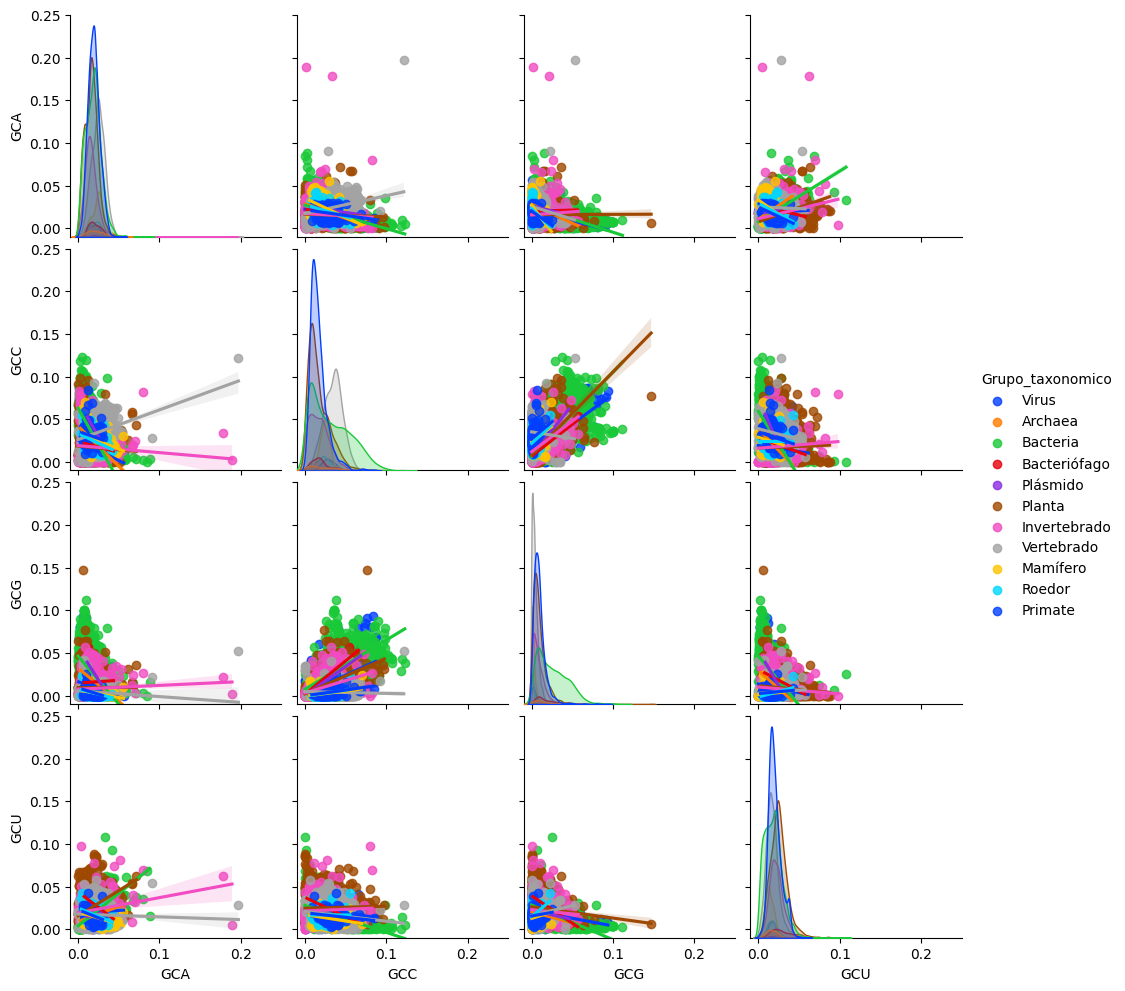

In [29]:
# Seleccionar los codones que codifican el aminoácido alanina.
alanina = codones.loc[:, ['GCA', 'GCC', 'GCG', 'GCU']]

# Concatenar las variables.
df = pd.concat([data["Grupo_taxonomico"], alanina], axis=1)

# Setear paleta de colores.
colors = sns.color_palette("bright", 11)

# Crear gráficos de dispersión + líneas de tendencia para todas las combinaciones.
plot = sns.pairplot(df, hue="Grupo_taxonomico", kind="reg", palette=colors)

# Usar la misma escala en los gráficos.

#plot.axes[0,0].set_xlim((0, 0.20))
#plot.axes[0,0].set_ylim((0, 0.20))

lim = (0, 1, 2, 3)

for i, j in zip(lim, lim):
    plot.axes[i,j].set_xlim((-0.01, 0.25))
    plot.axes[i,j].set_ylim((-0.01, 0.25))

plt.show()

Figura 7: Gráficos de dispersión entre todos los pares de codones que codifican el aminoácido alanina. La leyenda de colores indica el grupo taxonómico del organismo.

En la diagonal se observa que los grupos están superpuestos, es decir que estos codones por sí mismos no son lo suficientemente informativos como para separar correctamente por grupo taxonómico. Sin embargo, las mayores diferencias se observaron para el codón GCC, con distribuciones más separadas y asimétricas respecto de los demás pares.
No parecen existir relaciones significativas entre las frecuencias de uso de los codones de alanina, con excepción de GCC y GCG, donde se observa una relación positiva entre las variables para varios grupos (por ej, Planta, Bacteria, Archaea, Bacteriófago).

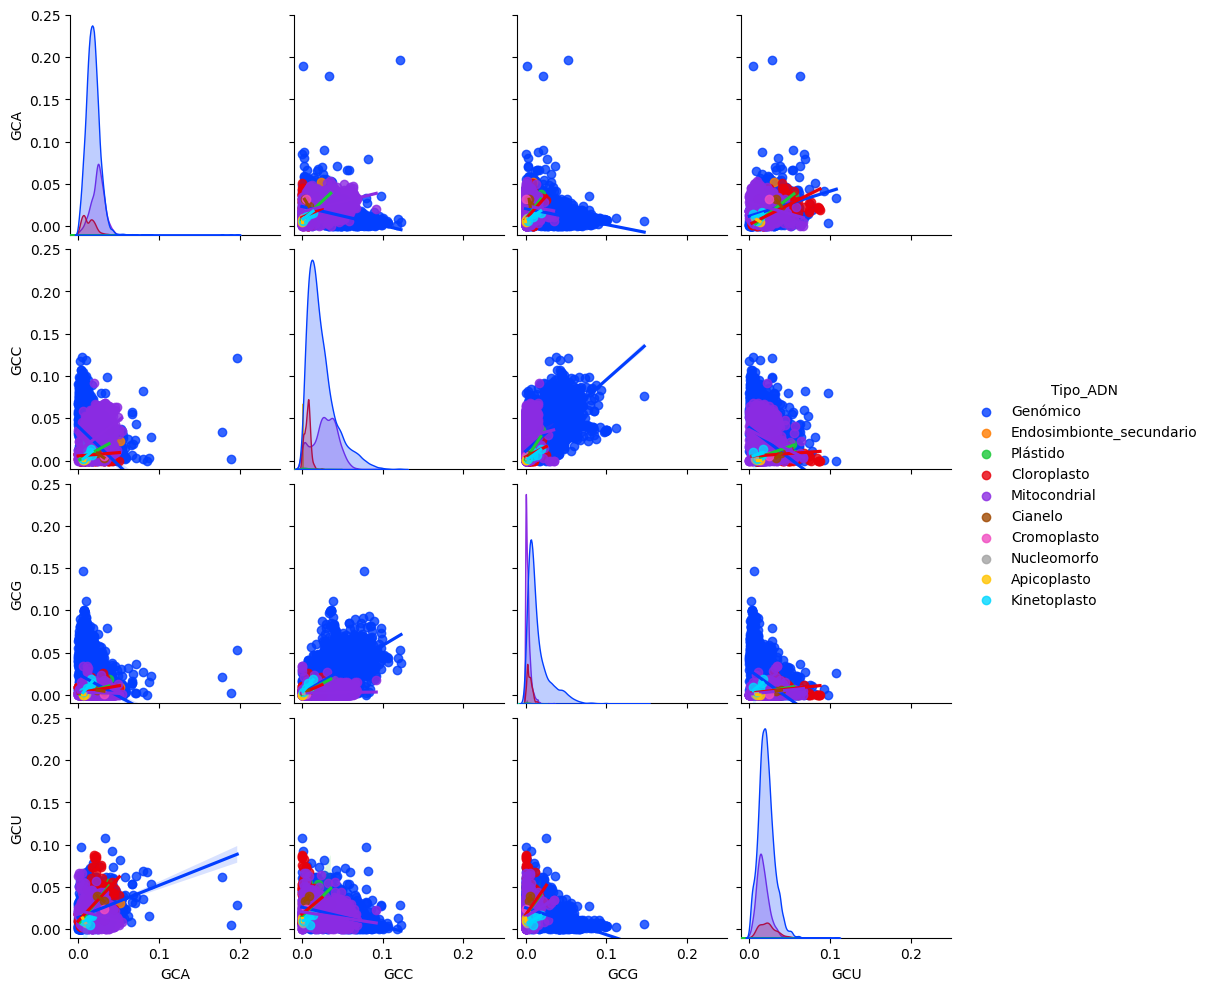

In [30]:
# Seleccionar los codones que codifican el aminoácido alanina.
#alanina = codones.loc[:, ['GCA', 'GCC', 'GCG', 'GCU']]

# Concatenar las variables.
df = pd.concat([data["Tipo_ADN"], alanina], axis=1)

# Setear paleta de colores.
colors = sns.color_palette("bright", 10)

# Crear gráficos de dispersión + líneas de tendencia para todas las combinaciones.
plot = sns.pairplot(df, hue="Tipo_ADN", kind="reg", palette=colors)

# Usar la misma escala en los gráficos.

lim = (0, 1, 2, 3)

for i, j in zip(lim, lim):
    plot.axes[i,j].set_xlim((-0.01, 0.25))
    plot.axes[i,j].set_ylim((-0.01, 0.25))

plt.show()

Figura 8: Gráficos de dispersión entre todos los pares de codones que codifican el aminoácido alanina. La leyenda de colores indica el origen del ADN.

Al igual que en la Figura 7, los grupos no se separaron claramente por origen del ADN cuando se analizaron las frecuencias de uso de codones de alanina. Nuevamente se observa la relación positiva entre GCC y GCG. Asimismo, se observa que la gran mayoría de los datos corresponden a codones de origen genómico.

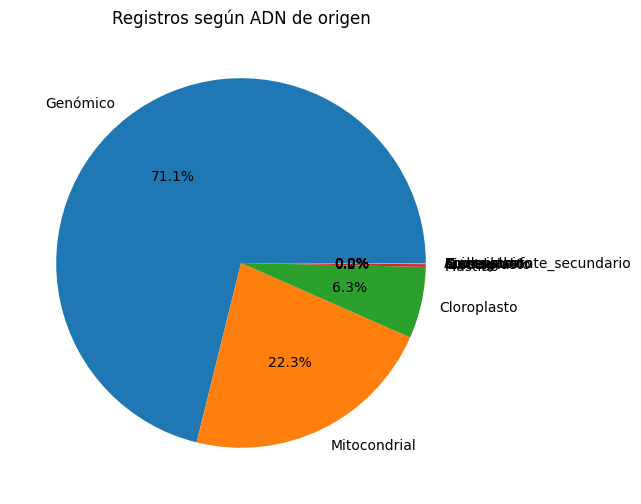

In [31]:
# Gráfico de torta describiendo los registros del dataset por tipo de ADN.

# Contar registros por tipo de ADN.
kingdom_counts = data['Tipo_ADN'].value_counts()

# Tamaño de la figura.
plt.figure(figsize=(6, 6))

# Graficar usando índices de 'kingdom_counts' como etiquetas, y agregar los valores numéricos con un decimal.
plt.pie(kingdom_counts, labels=kingdom_counts.index, autopct='%1.1f%%')

# Agregar título.
plt.title('Registros según ADN de origen')
plt.show()

Figura 9: Clasificación de registros del dataset según tipo de ADN (ADN de origen).

La Figura 9 muestra que más del 70% de los registros corresponden a ADN genómico, seguido de mitocondrial con el 22.3%. Para análisis posteriores quizás sea preferible eliminar aquellos registros con N muy bajos.

## 5. ¿Cómo varía la frecuencia de uso de todos los codones dentro de cada grupo taxonómico?

Habiendo observado que las correlaciones entre frecuencias parecen depender de cada grupo particular, se realizaron gráficos de radar para distintos grupos taxonómicos con el fin de visualizar la frecuencia en el uso de todos los codones en conjunto.

In [33]:
data2 = pd.read_csv('codon_usage_v2.csv', low_memory=False)
data3 = data2.iloc[:, [0] + list(range(6, 70))]
print(data3.shape)

(13024, 65)


In [34]:
data3.head()

,Grupo_taxonomico,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,Virus,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,Virus,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,Virus,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,Virus,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,Virus,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


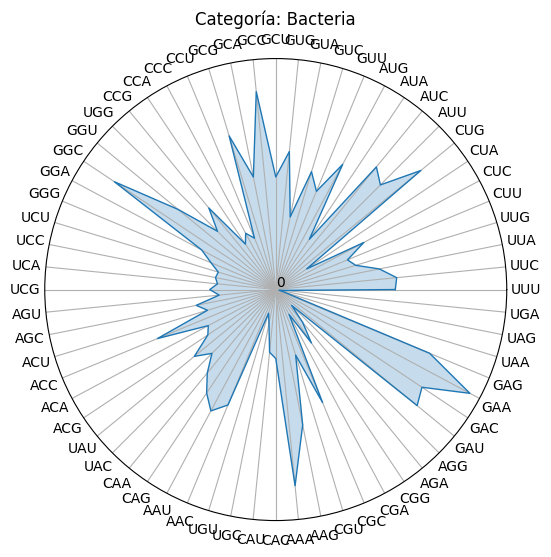

In [35]:
# Extraer las columnas con frecuencias de codones.
frecuencias = data3.iloc[:, 1:]

# Filtrar el dataset por la categoría taxonómica de interés.
grupo_taxo = 'Bacteria'
subset = data3[data3['Grupo_taxonomico'] == grupo_taxo]
subset_numericas = subset.iloc[:, 1:]

# Calcular los valores promedio para cada codón.
valores_promedio = subset_numericas.mean().values

# Calcular los ángulos para el gráfico de radar.
angulos = np.linspace(0, 2 * np.pi, len(valores_promedio), endpoint=False).tolist()
angulos += angulos[:1]
valores_promedio = np.concatenate((valores_promedio, [valores_promedio[0]]))

# Plot.
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': 'polar'})

ax.set_xticks(angulos[:-1])
ax.set_xticklabels(frecuencias.columns.tolist())
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(['0', '0.5', '1'])

ax.plot(angulos, valores_promedio, linewidth=1, linestyle='solid')
ax.fill(angulos, valores_promedio, alpha=0.25)

# Título.
ax.set_title(f'Categoría: {grupo_taxo}')

plt.show()

Figura 10: Gráfico de radar del grupo Bacteria mostrando la frecuencia de uso de todos los codones del dataset.

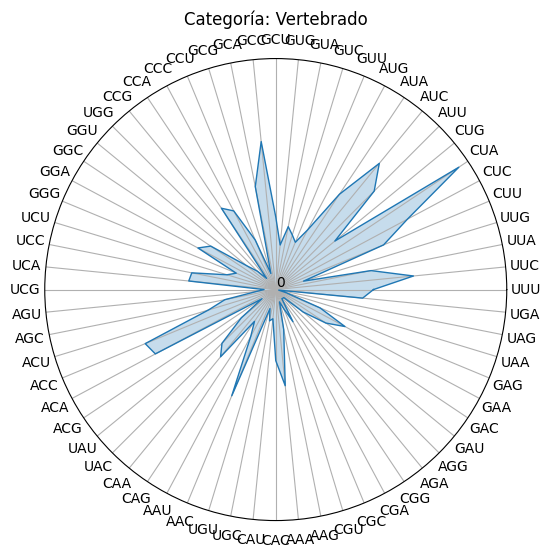

In [36]:
# Extraer las columnas con frecuencias de codones.
frecuencias = data3.iloc[:, 1:]

# Filtrar el dataset por la categoría taxonómica de interés.
grupo_taxo = 'Vertebrado'
subset = data3[data3['Grupo_taxonomico'] == grupo_taxo]
subset_numericas = subset.iloc[:, 1:]

# Calcular los valores promedio para cada codón.
valores_promedio = subset_numericas.mean().values

# Calcular los ángulos para el gráfico de radar.
angulos = np.linspace(0, 2 * np.pi, len(valores_promedio), endpoint=False).tolist()
angulos += angulos[:1]
valores_promedio = np.concatenate((valores_promedio, [valores_promedio[0]]))

# Plot.
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': 'polar'})

ax.set_xticks(angulos[:-1])
ax.set_xticklabels(frecuencias.columns.tolist())
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(['0', '0.5', '1'])

ax.plot(angulos, valores_promedio, linewidth=1, linestyle='solid')
ax.fill(angulos, valores_promedio, alpha=0.25)

# Título.
ax.set_title(f'Categoría: {grupo_taxo}')

plt.show()

Figura 11: Gráfico de radar del grupo Vertebrado mostrando la frecuencia de uso de todos los codones del dataset.

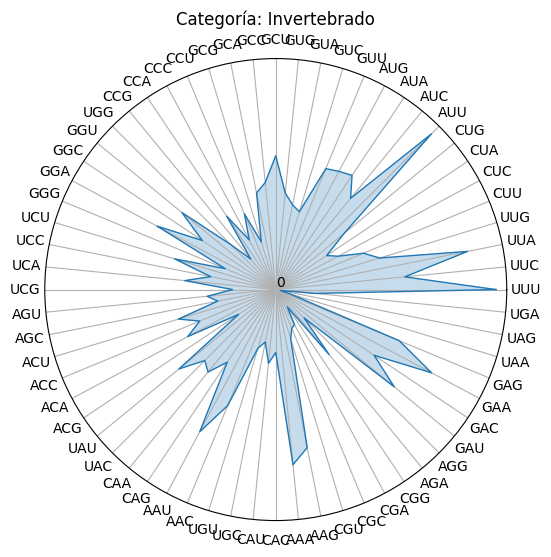

In [37]:
# Extraer las columnas con frecuencias de codones.
frecuencias = data3.iloc[:, 1:]

# Filtrar el dataset por la categoría taxonómica de interés.
grupo_taxo = 'Invertebrado'
subset = data3[data3['Grupo_taxonomico'] == grupo_taxo]
subset_numericas = subset.iloc[:, 1:]

# Calcular los valores promedio para cada codón.
valores_promedio = subset_numericas.mean().values

# Calcular los ángulos para el gráfico de radar.
angulos = np.linspace(0, 2 * np.pi, len(valores_promedio), endpoint=False).tolist()
angulos += angulos[:1]
valores_promedio = np.concatenate((valores_promedio, [valores_promedio[0]]))

# Plot.
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': 'polar'})

ax.set_xticks(angulos[:-1])
ax.set_xticklabels(frecuencias.columns.tolist())
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(['0', '0.5', '1'])

ax.plot(angulos, valores_promedio, linewidth=1, linestyle='solid')
ax.fill(angulos, valores_promedio, alpha=0.25)

# Título.
ax.set_title(f'Categoría: {grupo_taxo}')

plt.show()

Figura 12: Gráfico de radar del grupo Invertebrado mostrando la frecuencia de uso de todos los codones del dataset.

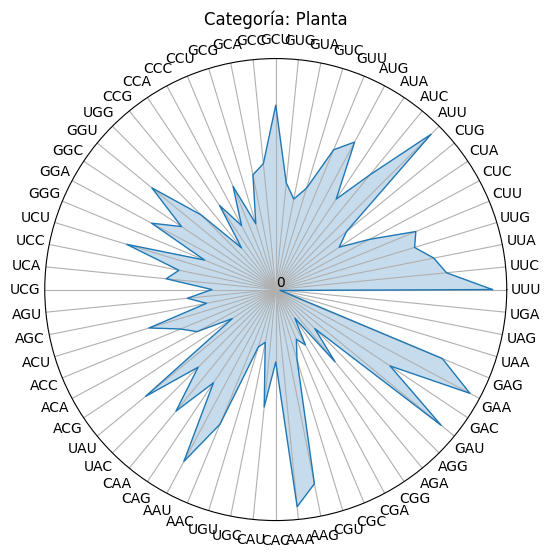

In [38]:
# Extraer las columnas con frecuencias de codones.
frecuencias = data3.iloc[:, 1:]

# Filtrar el dataset por la categoría taxonómica de interés.
grupo_taxo = 'Planta'
subset = data3[data3['Grupo_taxonomico'] == grupo_taxo]
subset_numericas = subset.iloc[:, 1:]

# Calcular los valores promedio para cada codón.
valores_promedio = subset_numericas.mean().values

# Calcular los ángulos para el gráfico de radar.
angulos = np.linspace(0, 2 * np.pi, len(valores_promedio), endpoint=False).tolist()
angulos += angulos[:1]
valores_promedio = np.concatenate((valores_promedio, [valores_promedio[0]]))

# Plot.
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': 'polar'})

ax.set_xticks(angulos[:-1])
ax.set_xticklabels(frecuencias.columns.tolist())
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(['0', '0.5', '1'])

ax.plot(angulos, valores_promedio, linewidth=1, linestyle='solid')
ax.fill(angulos, valores_promedio, alpha=0.25)

# Título
ax.set_title(f'Categoría: {grupo_taxo}')

plt.show()

Figura 13: Gráfico de radar del grupo Planta mostrando la frecuencia de uso de todos los codones del dataset.

En las Figuras 10-13 se observa que distintos grupos taxonómicos presentan distintos patrones en las frecuencias de uso de codones. Por ejemplo, el grupo Vertebrado muestra una preferencia por el codón CUA (Figura 11) que no presentan los grupos Bacteria, Invertebrado y Planta (Figuras 10, 12 y 13). Estos resultados soportan la hipótesis de que es posible clasificar las secuencias en grupos taxonómicos a partir del conjunto de sus datos de frecuencias.

## 6. Análisis de componentes principales (PCA)

Para evaluar si el conjunto de datos podía describirse mediante métodos de reducción de dimensionalidad, se realizó un análisis de componentes principales con todas las frecuencias, discriminando en los gráficos las categorías de las variables explicativas.

### 6.1. PCA por grupo taxonómico

In [39]:
valores_unicos = data3['Grupo_taxonomico'].unique()
print(valores_unicos) # 11 grupos

['Virus' 'Archaea' 'Bacteria' 'Bacteriófago' 'Plásmido' 'Planta'
 'Invertebrado' 'Vertebrado' 'Mamífero' 'Roedor' 'Primate']


['Virus' 'Archaea' 'Bacteria' 'Bacteriófago' 'Plásmido' 'Planta'
 'Invertebrado' 'Vertebrado' 'Mamífero' 'Roedor' 'Primate']


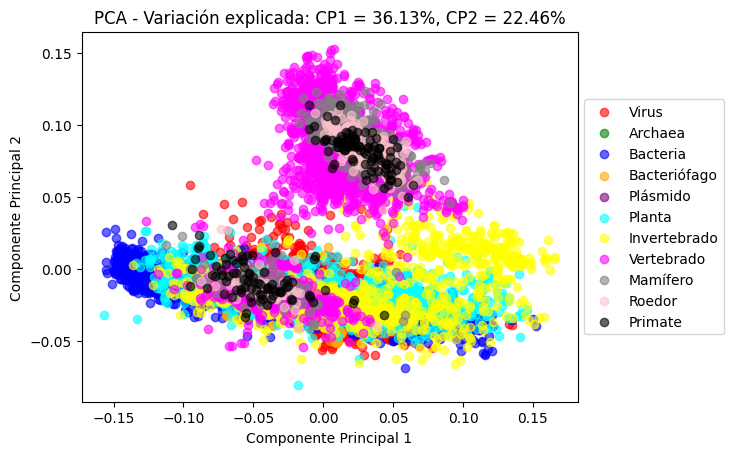

In [40]:
valores_unicos = data3['Grupo_taxonomico'].unique()
print(valores_unicos) # 11 grupos

# PCA.
pca = PCA(n_components=2)
components = pca.fit_transform(data3.iloc[:, 1:])

# Obtener categorías únicas de la columna "Grupo_taxonomico".
grupo_taxo = data3['Grupo_taxonomico'].unique()

# PCA con colores por categoría.
colores = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'yellow', 'magenta', 'gray', 'pink', 'black']

fig, ax = plt.subplots()
for categoria, color in zip(grupo_taxo, colores):
    indices = data3['Grupo_taxonomico'] == categoria
    ax.scatter(components[indices, 0], components[indices, 1], c=color, label=categoria, alpha=0.6)

ax.legend()
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')

# Porcentaje de variación explicado por cada componente principal.
var_exp = pca.explained_variance_ratio_
ax.set_title(f'PCA - Variación explicada: CP1 = {var_exp[0]*100:.2f}%, CP2 = {var_exp[1]*100:.2f}%')

# Posición de la leyenda.
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Figura 14: Análisis de componentes principales (CP 1 y 2) con las frecuencias de uso de codones clasificados según grupo taxonómico.

En la Figura 14 se observa que existe bastante superposición entre los grupos taxonómicos. El CP2 discrimina bastante bien al grupo formado por los vertebrados (Vertebrado + Mamífero + Roedor + Primate), aunque sólo explica el 22.46% de la variación. A su vez, las CP1 y 2 separan el grupo conformado por Mamífero + Roedor + Primate. Sin embargo, se observan datos de vertebrados en otros grupos. La dispersión de los datos no permite distinguir la formación de otro cluster.

In [41]:
# Imprimir los componentes de carga de los codones.
nombres_columnas = data3.columns[1:]

componentes_de_carga = pca.components_

print("Componentes de carga:")
for i, componente in enumerate(componentes_de_carga):
    print(f"Componente {i+1}:")
    for nombre_col, carga in zip(nombres_columnas, componente):
        print(f"Carga de la característica {nombre_col}: {carga:.4f}")
    print()

Componentes de carga:
Componente 1:
Carga de la característica UUU: 0.2405
Carga de la característica UUC: -0.0775
Carga de la característica UUA: 0.3034
Carga de la característica UUG: 0.0376
Carga de la característica CUU: 0.0768
Carga de la característica CUC: -0.1315
Carga de la característica CUA: 0.1028
Carga de la característica CUG: -0.2450
Carga de la característica AUU: 0.2572
Carga de la característica AUC: -0.1064
Carga de la característica AUA: 0.1917
Carga de la característica AUG: -0.0260
Carga de la característica GUU: 0.0917
Carga de la característica GUC: -0.1499
Carga de la característica GUA: 0.1023
Carga de la característica GUG: -0.1490
Carga de la característica GCU: 0.0566
Carga de la característica GCC: -0.2464
Carga de la característica GCA: 0.0514
Carga de la característica GCG: -0.1763
Carga de la característica CCU: 0.0463
Carga de la característica CCC: -0.0850
Carga de la característica CCA: 0.0609
Carga de la característica CCG: -0.1202
Carga de la carac

Cuando se calculan los componentes de carga de cada codón puede observarse que la contribución de cada uno es diferente a la hora de explicar la variabilidad de los datos.

['Virus' 'Archaea' 'Bacteria' 'Bacteriófago' 'Plásmido' 'Planta'
 'Invertebrado' 'Vertebrado' 'Mamífero' 'Roedor' 'Primate']


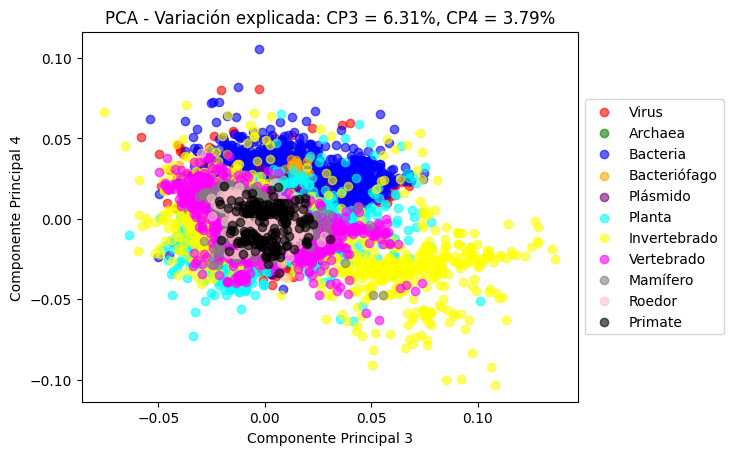

In [42]:
valores_unicos = data3['Grupo_taxonomico'].unique()
print(valores_unicos) # 11 grupos

# PCA.
pca = PCA(n_components=4)
components = pca.fit_transform(data3.iloc[:, 1:])

# Obtener categorías únicas de la columna "Grupo_taxonomico".
#grupo_taxo = data3['Grupo_taxonomico'].unique()

# PCA con colores por categoría.
colores = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'yellow', 'magenta', 'gray', 'pink', 'black']

fig, ax = plt.subplots()
for categoria, color in zip(grupo_taxo, colores):
    indices = data3['Grupo_taxonomico'] == categoria
    ax.scatter(components[indices, 2], components[indices, 3], c=color, label=categoria, alpha=0.6)

ax.legend()
ax.set_xlabel('Componente Principal 3')
ax.set_ylabel('Componente Principal 4')

# Porcentaje de variación explicado por cada componente principal.
var_exp = pca.explained_variance_ratio_
ax.set_title(f'PCA - Variación explicada: CP3 = {var_exp[2]*100:.2f}%, CP4 = {var_exp[3]*100:.2f}%')

# Posición de la leyenda.
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Figura 15: Análisis de componentes principales (CP 3 y 4) con las frecuencias de uso de codones clasificados según grupo taxonómico.

Las CP3 y 4 explican un porcentaje muy bajo de la variabilidad observada (6.31 y 3.79%, respectivamente).

### 6.2. PCA por tipo de ADN de origen

In [43]:
data4 = data2.iloc[:, [1] + list(range(6, 70))]

In [44]:
data4.head()

,Tipo_ADN,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,Genómico,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,Genómico,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,Genómico,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,Genómico,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,Genómico,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


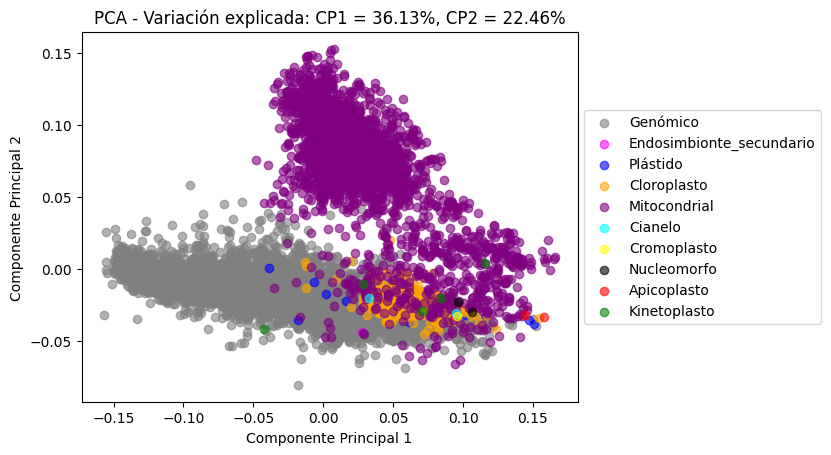

In [45]:
# PCA.
pca = PCA(n_components=4)
components = pca.fit_transform(data4.iloc[:, 1:])

# Obtener categorías únicas de la columna "Tipo_ADN".
tipo_adn = data4['Tipo_ADN'].unique()

# PCA con colores por categoría de "Grupo_taxonomico" y "Tipo_ADN".
colores = ['gray', 'magenta', 'blue', 'orange', 'purple', 'cyan', 'yellow', 'black', 'red', 'green']

fig, ax = plt.subplots()
for categoria, color in zip(tipo_adn, colores):
    indices = data2['Tipo_ADN'] == categoria
    ax.scatter(components[indices, 0], components[indices, 1], c=color, label=categoria, alpha=0.6)

ax.legend()
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')

# Porcentaje de variación explicado por cada componente principal
var_exp = pca.explained_variance_ratio_
ax.set_title(f'PCA - Variación explicada: CP1 = {var_exp[0]*100:.2f}%, CP2 = {var_exp[1]*100:.2f}%')

# Posición de la leyenda.
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Figura 16: Análisis de componentes principales (CP 1 y 2) con las frecuencias de uso de codones clasificados según origen del ADN.

En este PCA puede observarse que el grupo separado por las CP1 y 2 (identificado en la Figura 14 como vertebrados), parece incluir enteramente datos correspondientes a ADN mitocondrial de vertebrados.

In [46]:
valores_unicos = data4['Tipo_ADN'].unique()
print(valores_unicos) # 10 grupos

['Genómico' 'Endosimbionte_secundario' 'Plástido' 'Cloroplasto'
 'Mitocondrial' 'Cianelo' 'Cromoplasto' 'Nucleomorfo' 'Apicoplasto'
 'Kinetoplasto']


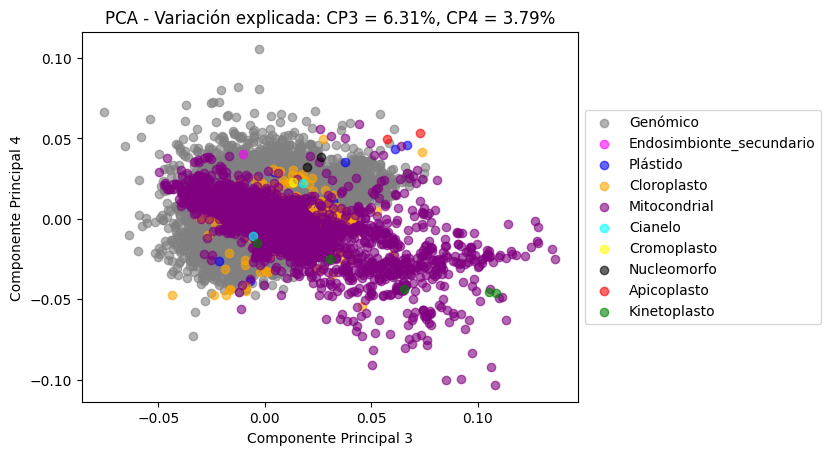

In [47]:
# PCA.
pca = PCA(n_components=4)
components = pca.fit_transform(data4.iloc[:, 1:])

# Obtener categorías únicas de la columna "Tipo_ADN".
tipo_adn = data4['Tipo_ADN'].unique()

# PCA con colores por categoría de "Tipo_ADN".
colores = ['gray', 'magenta', 'blue', 'orange', 'purple', 'cyan', 'yellow', 'black', 'red', 'green']

fig, ax = plt.subplots()
for categoria, color in zip(tipo_adn, colores):
    indices = data4['Tipo_ADN'] == categoria
    ax.scatter(components[indices, 2], components[indices, 3], c=color, label=categoria, alpha=0.6)

ax.legend()
ax.set_xlabel('Componente Principal 3')
ax.set_ylabel('Componente Principal 4')

# Porcentaje de variación explicado por cada componente principal
var_exp = pca.explained_variance_ratio_
ax.set_title(f'PCA - Variación explicada: CP3 = {var_exp[2]*100:.2f}%, CP4 = {var_exp[3]*100:.2f}%')

# Posición de la leyenda.
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Figura 17: Análisis de componentes principales (CP 3 y 4) con las frecuencias de uso de codones clasificados según origen del ADN.

En las Figuras 16 y 17 se observa que al clasificar los datos según ADN de origen, el análisis de componentes principales no es capaz de explicar la variabilidad observada en la muestra en base únicamente a esas categorías.

Todos estos resultados muestran que es posible que este dataset se beneficie de una categorización conjunta entre grupo taxonómico + tipo de ADN.

Además, es importante tener en cuenta que en la gran mayoría de los genomas, el ADN mitocondrial y ADN de otros orígenes no están discriminados del ADN genómico, sino que todas las secuencias están juntas en un solo archivo. Por este motivo, lo más útil sería poder agrupar los datos de tipo de ADN por grupo taxonómico.

# Conclusiones generales

1. Distintos grupos taxonómicos presentan distintos patrones en las frecuencias de uso de codones.
2. Los distintos codones ofrecen distinta información para clasificar secuencias en su grupo taxonómico y ADN de origen.
3. En análisis posteriores, este dataset podría beneficiarse de una categorización conjunta entre grupo taxonómico + tipo de ADN.